In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:



pqr_agrs_100_30k = pd.read_csv('../../runs/cass0221/eval2/lp_csv_merge.csv', header = 2)

In [3]:
pqr_agrs_100_30k

,wall_time,step,lp/jensenShannon,lp/value_from_net,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/total_games,lp/total_wins
0,1.613964e+09,5001094,0.499999,0.511111,1.0,1.0,1.0,180.0,-1.0,-1.0,0.0,0.0
1,1.613964e+09,5001274,0.499999,0.511111,2.0,1.0,0.0,300.0,-1.0,-1.0,0.0,0.0
2,1.613964e+09,5001574,0.499999,0.511111,3.0,2.0,1.0,96.0,-1.0,-1.0,0.0,0.0
3,1.613964e+09,5001670,0.499999,0.511111,4.0,2.0,0.0,300.0,-1.0,-1.0,0.0,0.0
4,1.613964e+09,5001970,0.499999,0.511111,5.0,2.0,0.0,300.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1.613964e+09,5058895,0.499999,0.511111,221.0,62.0,0.0,300.0,-1.0,-1.0,0.0,0.0
1200,1.613964e+09,5059195,0.499999,0.511111,222.0,63.0,1.0,178.0,-1.0,-1.0,0.0,0.0
1201,1.613964e+09,5059373,0.499999,0.511111,223.0,63.0,0.0,300.0,-1.0,-1.0,0.0,0.0
1202,1.613964e+09,5059673,0.499999,0.511111,224.0,64.0,1.0,126.0,-1.0,-1.0,0.0,0.0


In [4]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooledThirds = df_av_at_step
eval_pooledThirds


,step,reward,length,reward_se,length_se
0,5000288.0,1.000000,250.000000,0.000000,0.000000
1,5000317.0,0.499500,275.025000,0.500000,1250.000000
2,5000447.0,0.666667,210.554607,0.333334,13056.340615
3,5000458.0,0.750250,225.209819,0.249833,9551.193867
4,5000529.0,0.599600,240.227747,0.300100,8278.298737
...,...,...,...,...,...
1184,5059799.0,0.400885,247.871686,0.238284,5936.176621
1185,5059813.0,0.400002,247.986555,0.238113,5929.075017
1186,5059856.0,0.399120,248.101148,0.237940,5921.964199
1187,5059923.0,0.398241,248.215464,0.237766,5914.844309


In [5]:

pqr_agrs_100_30k = pd.read_csv('../../runs/cass0221/eval2/nolp_csv_merge.csv', header = 2)

In [6]:
pqr_agrs_100_30k

,wall_time,step,lp/jensenShannon,lp/value_from_net,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/total_games,lp/total_wins
0,1.613964e+09,5000108,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,0.0,0.0
1,1.613964e+09,5000408,0.499999,0.511111,2.0,0.0,0.0,300.0,-1.0,-1.0,0.0,0.0
2,1.613964e+09,5000708,0.499999,0.511111,3.0,1.0,1.0,165.0,-1.0,-1.0,0.0,0.0
3,1.613964e+09,5000873,0.499999,0.511111,4.0,2.0,1.0,257.0,-1.0,-1.0,0.0,0.0
4,1.613964e+09,5001130,0.499999,0.511111,5.0,2.0,0.0,300.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1.613964e+09,5058738,0.499999,0.511111,212.0,33.0,0.0,300.0,-1.0,-1.0,0.0,0.0
2650,1.613964e+09,5059038,0.499999,0.511111,213.0,34.0,1.0,275.0,-1.0,-1.0,0.0,0.0
2651,1.613964e+09,5059313,0.499999,0.511111,214.0,34.0,0.0,300.0,-1.0,-1.0,0.0,0.0
2652,1.613964e+09,5059613,0.499999,0.511111,215.0,34.0,0.0,300.0,-1.0,-1.0,0.0,0.0


In [7]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooled = df_av_at_step
eval_pooled



,step,reward,length,reward_se,length_se
0,5000061.0,1.000000,110.000000,0.000000,0.000000
1,5000108.0,0.499500,205.095000,0.500000,18050.000000
2,5000109.0,0.666667,228.777286,0.333334,10693.489956
3,5000136.0,0.499500,246.636417,0.333334,8392.567028
4,5000171.0,0.399200,257.351867,0.299800,6859.370223
...,...,...,...,...,...
2607,5059934.0,0.438517,249.268017,0.244979,5411.932610
2608,5059950.0,0.439645,249.267479,0.245120,5401.060677
2609,5059974.0,0.440771,249.062037,0.245258,5411.199556
2610,5059994.0,0.439885,249.164363,0.245155,5405.536278


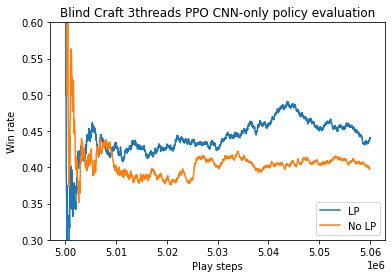

In [14]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA,ax=axs, ci=99,
 #            )
sns.lineplot(x="step", y="reward", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="reward", data=eval_pooledThirds,ax=axs, ci=99,
             )
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.3, 0.6) )
plt.title('Blind Craft 3threads PPO CNN-only policy evaluation')

axs.legend(['LP','No LP'], loc=4)


NameError: name 'df_no_agrs' is not defined

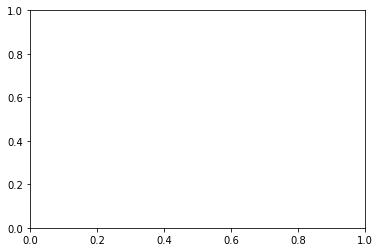

In [9]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99, color=col[3] )
sns.lineplot(x="step", y="reward", data=df_no_lp_no_dfa,ax=axs, ci=99, color=col[4] )


#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.37, 0.63))
plt.title('Blind Craft 3threads CNN-only policy evaluation...no DFA')

axs.legend(['1LP / No DFA', 'No LP / No DFA'], loc=4)


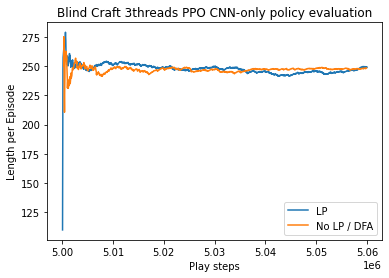

In [15]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="length", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="length", data=eval_pooledThirds,ax=axs, ci=99,
             )
axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Blind Craft 3threads PPO CNN-only policy evaluation')

axs.legend(['LP', 'No LP / DFA'], loc=4)

